In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



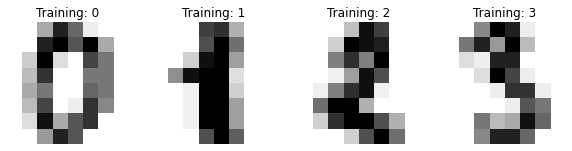

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.
**văn bản in đậm**
We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data[0])

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Below we visualize the first 4 test samples and show their predicted
digit value in the title.



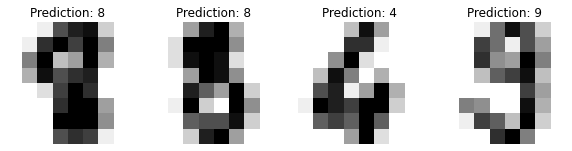

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


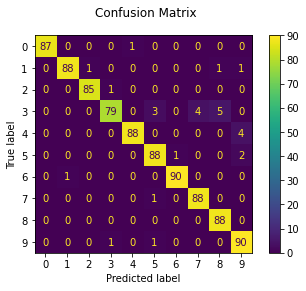

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

##Webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

##Capture

<IPython.core.display.Javascript object>

Saved to photo.jpg


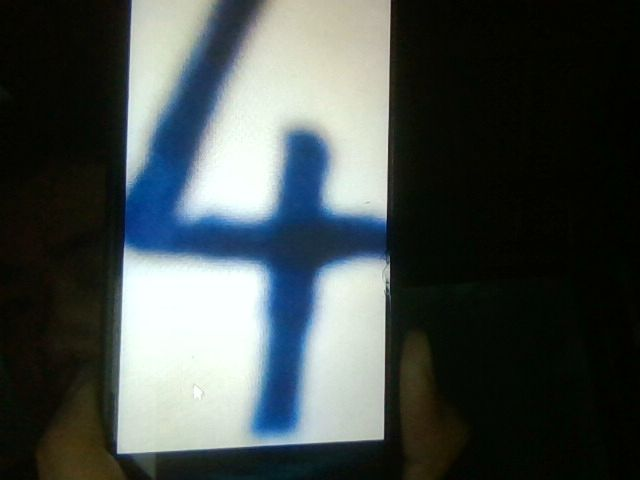

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2

In [ ]:
#Đọc ảnh vừa chụp được với grayscale mode
grayscale_image = cv2.imread('photo.jpg',0)
#Resize ảnh về 8x8 
grayscale_image = cv2.resize(grayscale_image,(8,8)) 
#Ảnh chụp từ máy tính được đọc có các phần tử trong ma trận từ 0 - 255 do đó phải scale ma trận ảnh về 0 - 15 (giống với dữ liệu training)
grayscale_image = grayscale_image/255*15 
#Reshape ma trận ảnh về 1x64
grayscale_image = grayscale_image.reshape(1,-1)


In [ ]:
grayscale_image

array([[ 0.41176471,  1.23529412,  9.17647059, 12.17647059, 11.11764706,
         0.41176471,  0.29411765,  0.23529412,  0.35294118,  1.47058824,
         3.05882353, 13.76470588, 12.35294118,  0.41176471,  0.29411765,
         0.23529412,  0.29411765,  1.47058824,  9.23529412, 11.52941176,
        13.52941176,  0.47058824,  0.35294118,  0.23529412,  0.70588235,
         0.88235294, 12.58823529,  5.11764706, 11.64705882,  0.47058824,
         0.29411765,  0.23529412,  0.76470588,  2.70588235, 14.58823529,
         3.        , 12.70588235,  0.47058824,  0.23529412,  0.23529412,
         0.47058824,  6.52941176, 14.94117647,  3.82352941, 13.29411765,
         0.58823529,  0.41176471,  0.23529412,  0.58823529, 12.29411765,
        14.35294118,  3.05882353, 12.        ,  0.52941176,  0.35294118,
         0.11764706,  1.58823529, 10.82352941,  6.94117647,  1.82352941,
         1.47058824,  1.52941176,  0.29411765,  0.35294118]])

In [ ]:
#predict
print(clf.predict(grayscale_image))

[4]


##Kết Luận

1. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
- Kết quả đạt được chưa được như mong đợi
2. Ủa mà nhìn vào đâu để kết luận là tốt hay không?
- Do qua nhiều lần thử thì số lần predict đúng khá là ít. Kết quả bên trên là 1 trong những lần hiếm hoi nhóm chúng em predict đúng như thực tế 
3. Nếu không tốt thì lý do tại sao?
- Theo em nghĩ là do chất lượng, độ phân giải của bức ảnh được chụp từ webcam laptop chưa thực sự tốt.
- Bức ảnh được chụp từ webcam có giá trị các phần tử trong ma trận ảnh thuộc đoạn 0 đến 255 nên sau khi đưa về đoạn 0 đến 15 giống với dữ liệu training thì một phần thông tin sẽ bị mất mát.
- Model overfit với tập dataset mà thư viện scikit-learn cung cấp nên khi đưa input 1 ảnh được chụp từ webcam thì khó có thể có 1 ảnh giống với dataset trên nên dẫn đến predict sai.
4. Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
- Không.
- Vì các bài toán phức tạp hơn trong thực tế đòi hỏi độ chính xác cao, việc áp dụng model digits recognition cần lượng data lớn để đạt được kết quả tốt với nhiều input phức tạp. 
- Thứ 2 là do dataset trên chưa đủ độ phong phú để có thể đào tạo ra 1 model tốt được. Vì trong thực tế, khi áp dụng vào thì ảnh có thể được chụp trong các môi trường khác nhau và góc chụp khác nhau, ảnh input có thể nghiêng lệch,.. nên model được đào tạo trên chưa đáp ứng được các bài toán thực tế
- Hiện nay có nhiều phương pháp tốt hơn là sử dụng model digits recognition giúp giảm thiểu chi phí và đạt được kết quả tốt hơn.
- Ngoài ra thì deep learning đang ngày càng phát triển và có thể hỗ trợ rất nhiều đồng thời có độ chính xác cao,...điển hình như các mô hình của mạng CNN ,LSTM hay transformer, Bert,...những mô hình trên còn trích xuất được nội dung 1 cách khách quan nên việc áp dụng model trên vào thực tế là thiếu thuyết phục.

